# Supervised Learning with Scikit-Learn Part 1

In [1]:
from sklearn import datasets 
# loading data set of sklearn

In [3]:
# import computation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')# set ggplot theam as style


In [4]:
# Load iris data set
iris = datasets.load_iris()

In [6]:
# Data type is BUNCH.It's more like dictionary 
type(iris)
# sklearn.datasets.base.Bunch

sklearn.datasets.base.Bunch

In [9]:
print(iris.keys())
# ['target_names', 'data', 'target', 'DESCR', 'feature_names']

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [11]:
iris.data.shape
# (150L, 4L)

(150L, 4L)

In [28]:
x = iris.data # make numpy arr
y = iris.target
df = pd.DataFrame(x, columns=iris.feature_names)# Make Data frame
df.head(3)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


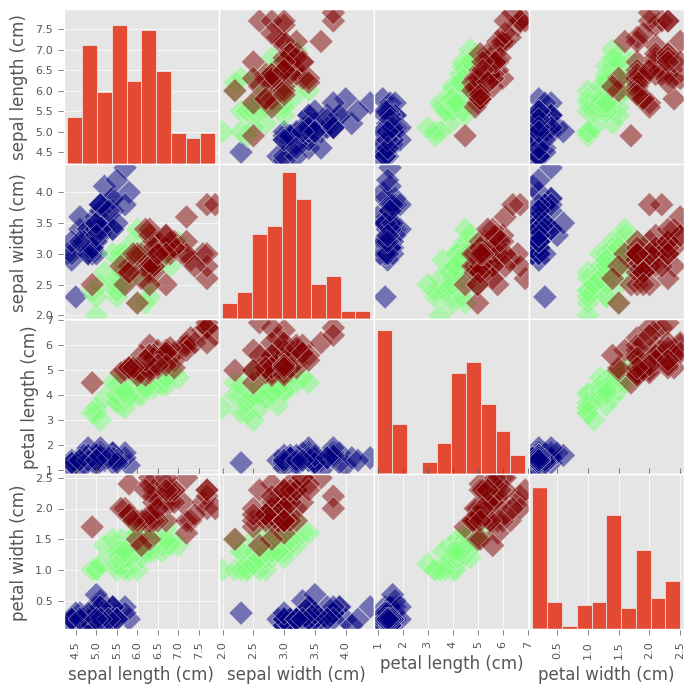

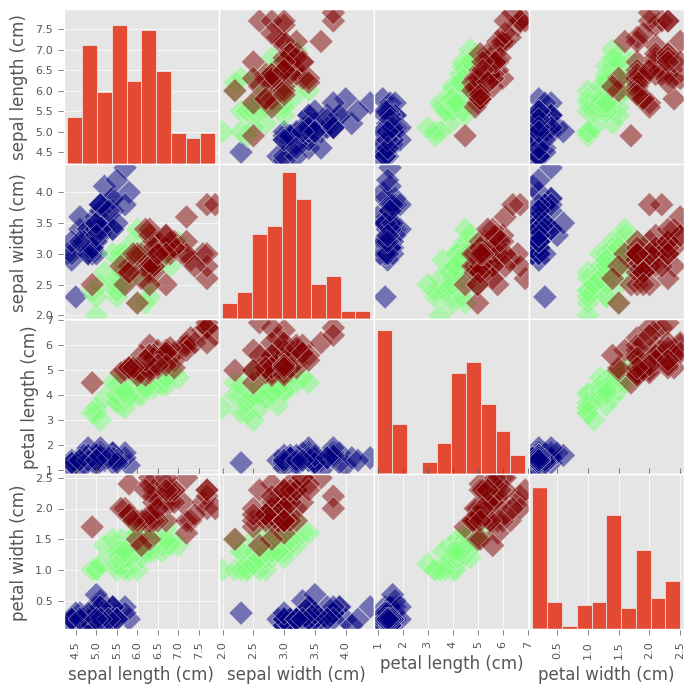

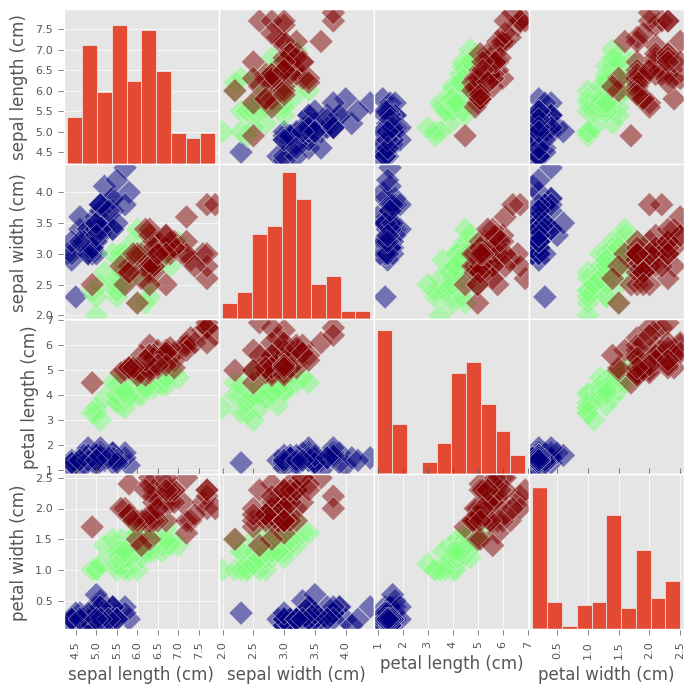

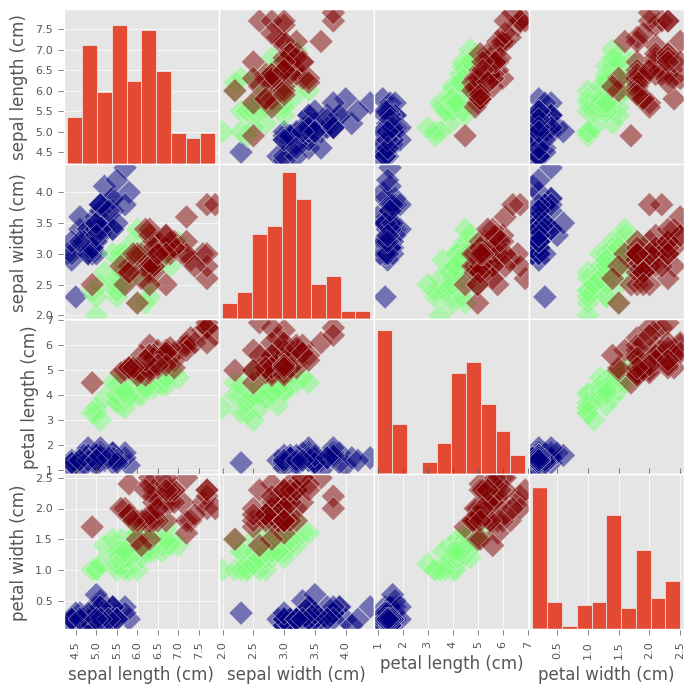

In [21]:
# Visul EDA
_ = pd.scatter_matrix(df,c = y, figsize = [8,8], s =150 , marker = 'D')
# s = Sample size ,c = color , 
plt.show()

In [22]:
# Classification Challenge 
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
    

In [25]:
knn = KNeighborsClassifier(n_neighbors=6)
# Now we are going to fit knn 
knn.fit(iris['data'],iris['target'])
# knn pass two argument .No one is samples as numpy array, No two is fetures as a numpy array



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [36]:
# Prediction part 
x_new = [[ 5.1 ,3.5  ,1.4 , 0.2],
 [ 4.9,  3.1  , 1.4 , 0.2],
 [ 4.7 , 3.2 , 1.3 , 0.2]]
X_new = pd.DataFrame(x_new)
prediction = knn.predict(x_new)
X_new.shape
print ('prediction{}'.format(prediction))


prediction[0 0 0]


In [ ]:
# Measuring Model Perfomance 
# In calssification ,accuracy is a commonly used metric
# Accuracy  = Fraction of correct prediction 
# Data set split to test set and train  set 


In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test = train_test_split(x,y,test_size =0.3,random_state = 21 ,stratify = y)

In [40]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [42]:
print("test set prediction : \n{}".format(y_pred))

test set prediction : 
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [44]:
# Score
knn.score(X_test,y_test)

0.9555555555555556

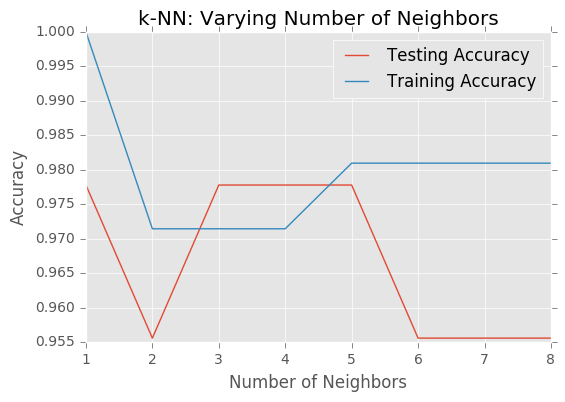

In [45]:
# Model Complexity 
# Lager K  =  smoother decision boundry = less complex model
# Smaller K  = more complex model =can lead to overfit 
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
